In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )
sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (20,10)


In [5]:
sales_target = pd.read_csv("SalesTarget.csv")
order_details = pd.read_csv("Details.csv")
list_orders = pd.read_csv("Orders.csv")

In [12]:
orders = list_orders.merge(order_details, on='Order ID')
orders.head()


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [13]:
# df orders
new_cols = {}
for col in orders.columns:
    new_col = col.replace(" ", "_").replace("-","_").lower()
    new_cols[col] = new_col
orders = orders.rename(columns = new_cols)

# extract month and year
orders['month'] = orders['order_date'].apply(lambda x: x.split("-")[1])
orders['year'] = orders['order_date'].apply(lambda x: x.split("-")[2])
orders['month'] = orders['month'].astype(int)
orders['year'] = orders['year'].astype(int)
# parse to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'],dayfirst = True )
# orders['margin'] = round(orders['amount'] / orders['profit'])

# df sales target
cols_target = {'Month of Order Date':'month_order_date', 'Category':'category'}
sales_target.rename(columns = cols_target, inplace =True)
sales_target['month'] = sales_target['month_order_date'].apply(lambda x: x.split("-")[0])
sales_target['year'] = sales_target['month_order_date'].apply(lambda x: x.split("-")[1])
sales_target['year'] = sales_target['year'].astype(int)
sales_target['year'] = sales_target['year'] + 2000
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
sales_target['month'] = sales_target.month.map(month_map)
sales_target.head()

,month_order_date,category,Target,month,year
0,Apr-18,Furniture,10400.0,4,2018
1,May-18,Furniture,10500.0,5,2018
2,Jun-18,Furniture,10600.0,6,2018
3,Jul-18,Furniture,10800.0,7,2018
4,Aug-18,Furniture,10900.0,8,2018


**EDA**

In [14]:
order_agrup  = orders.groupby(['customername','state','city','category', 'month', 'year'])[['amount','profit', 'quantity']]\
                     .sum()\
                     .reset_index()

order_agrup.head()

,customername,state,city,category,month,year,amount,profit,quantity
0,Aakanksha,Madhya Pradesh,Indore,Clothing,7,2018,33.0,-12.0,7
1,Aakanksha,Madhya Pradesh,Indore,Furniture,7,2018,41.0,-6.0,1
2,Aarushi,Tamil Nadu,Chennai,Clothing,2,2019,61.0,8.0,4
3,Aarushi,Tamil Nadu,Chennai,Clothing,3,2019,833.0,10.0,15
4,Aarushi,Tamil Nadu,Chennai,Clothing,4,2018,257.0,23.0,5


In [17]:
def atp_cal(col, data: pd.DataFrame,top = 30):

    data = data.groupby([col])[['amount', 'quantity']].sum().reset_index()
    data['avg_ticket_price'] = round(data['amount'] / data['quantity'],2)
    data.sort_values(by='avg_ticket_price', ascending = False, inplace =True)
    data = data.head(top)

    return data


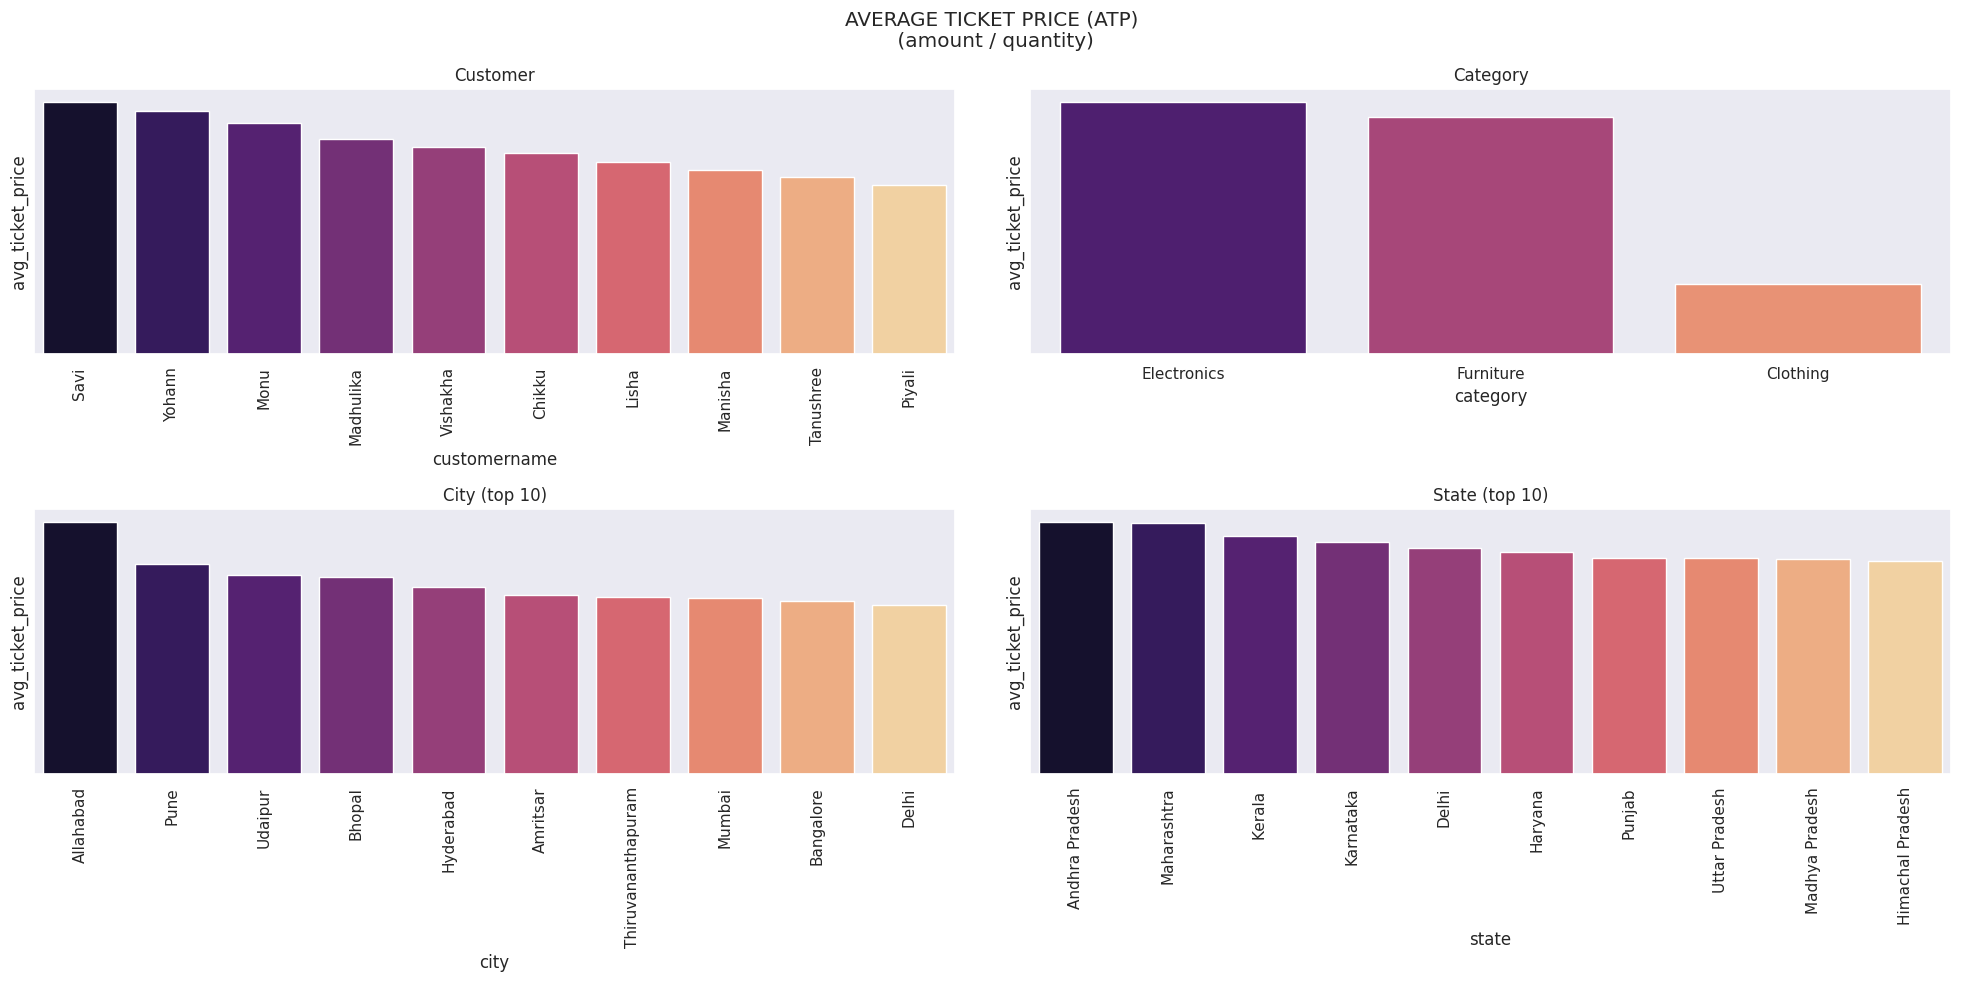

In [20]:
plt.suptitle("AVERAGE TICKET PRICE (ATP)\n (amount / quantity)")


# customer
atp = atp_cal('customername',order_agrup)
avg_all = atp['amount'].sum() / atp['quantity'].sum()
atp_10 = atp.head(10)

plt.subplot(2,2,1)
c_1 = sns.barplot(x = atp_10.customername, y =atp_10.avg_ticket_price, palette='magma');
# c_1.axhline(avg_all)
plt.title("Customer");
plt.tight_layout();
plt.xticks(rotation=90);
#get_label(c_1);
c_1.set(yticks=[]);


# Category
atp_category = atp_cal('category',order_agrup)
plt.subplot(2,2,2)
c_2 = sns.barplot(x = atp_category.category, y =atp_category.avg_ticket_price, palette='magma');
plt.title("Category");
plt.tight_layout();
#get_label(c_2)
c_2.set(yticks=[]);

# City
atp_city = atp_cal('city',order_agrup, 10)
atp_city = atp_city.head(10)
plt.subplot(2,2,3)
c_3 = sns.barplot(x = atp_city.city, y =atp_city.avg_ticket_price, palette='magma');
plt.title("City (top 10)");
plt.tight_layout();
plt.xticks(rotation=90);
#get_label(c_3)
c_3.set(yticks=[]);

# State
atp_state = atp_cal('state',order_agrup, 10)
atp_state = atp_state.head(10)
plt.subplot(2,2,4)
c_4 = sns.barplot(x = atp_state.state, y =atp_state.avg_ticket_price, palette='magma');
plt.title("State (top 10)");
plt.tight_layout();
plt.xticks(rotation=90);
#get_label(c_4)
c_4.set(yticks=[]);